/var/folders/pc/6rmkz3b536l1k66dbrhqbl2r0000gn/T/ipykernel_36574/2773573170.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_train[col].fillna(loan_train[col].mode()[0], inplace=True)
/var/folders/pc/6rmkz3b536l1k66dbrhqbl2r0000gn/T/ipykernel_36574/2773573170.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

--- Random Forest ---
Accuracy: 0.7000
              precision    recall  f1-score   support

           N       0.35      0.38      0.36        16
           Y       0.81      0.80      0.80        54

    accuracy                           0.70        70
   macro avg       0.58      0.59      0.58        70
weighted avg       0.71      0.70      0.70        70

--- Decision Tree ---
Accuracy: 0.6857
              precision    recall  f1-score   support

           N       0.38      0.56      0.45        16
           Y       0.85      0.72      0.78        54

    accuracy                           0.69        70
   macro avg       0.61      0.64      0.61        70
weighted avg       0.74      0.69      0.70        70

--- Logistic Regression ---
Accuracy: 0.6286
              precision    recall  f1-score   support

           N       0.33      0.62      0.43        16
           Y       0.85      0.63      0.72        54

    accuracy                           0.63        70
   ma

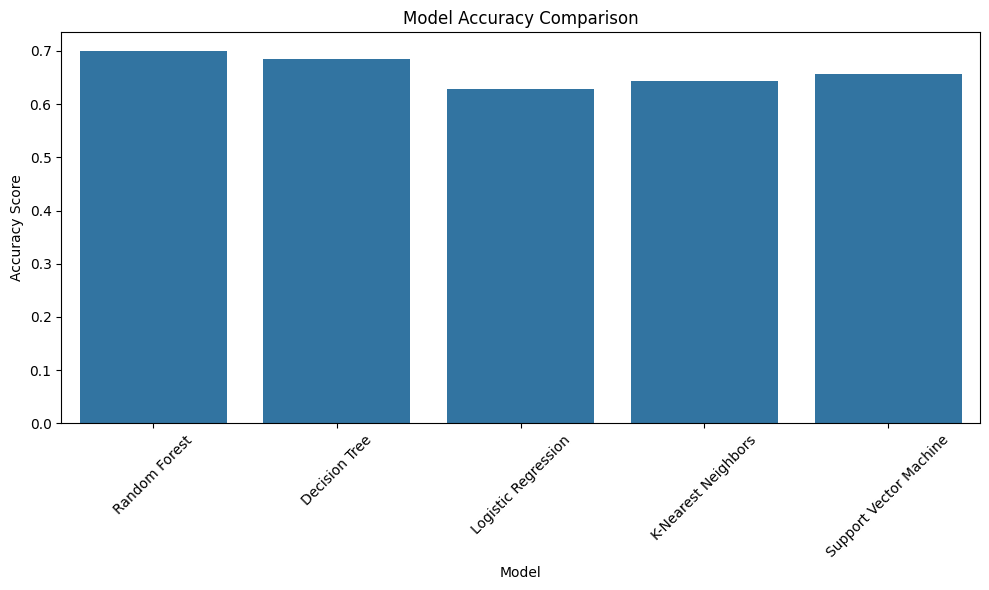

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
loan_train = pd.read_csv('data/loan-train.csv')

# Step 1: Clean the data
# Separate categorical and numerical columns
categorical_cols = loan_train.select_dtypes(include=['object']).columns
numerical_cols = loan_train.select_dtypes(exclude=['object']).columns

# Fill missing values: Categorical columns with mode, Numerical columns with mean
for col in categorical_cols:
    loan_train[col].fillna(loan_train[col].mode()[0], inplace=True)

for col in numerical_cols:
    loan_train[col].fillna(loan_train[col].mean(), inplace=True)

# Replace '3+' in Dependents with '3' and convert Dependents to numerical
loan_train['Dependents'] = loan_train['Dependents'].replace('3+', '3')

# One-hot encode categorical variables using pd.get_dummies
loan_train = pd.get_dummies(loan_train, columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'], drop_first=True)

# Step 2: Outlier Removal using IQR Method
Q1 = loan_train[numerical_cols].quantile(0.25)
Q3 = loan_train[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers based on IQR
loan_train = loan_train[~((loan_train[numerical_cols] < (Q1 - 1.5 * IQR)) | (loan_train[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Step 3: Normalize the numerical features
scaler = MinMaxScaler()
loan_train[numerical_cols] = scaler.fit_transform(loan_train[numerical_cols])

# Step 4: Prepare the data
X = loan_train.drop(columns=['Loan_ID', 'Loan_Status'])
y = loan_train['Loan_Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(random_state=42)
}

# Train models and evaluate their performance
model_accuracies = {}
for model_name, model in models.items():
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy
    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

# Step 6: Visualize the results
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()))
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


--- Random Forest ---
Accuracy: 0.7714
              precision    recall  f1-score   support

           N       0.50      0.06      0.11        16
           Y       0.78      0.98      0.87        54

    accuracy                           0.77        70
   macro avg       0.64      0.52      0.49        70
weighted avg       0.72      0.77      0.70        70

--- Decision Tree ---
Accuracy: 0.7286
              precision    recall  f1-score   support

           N       0.42      0.50      0.46        16
           Y       0.84      0.80      0.82        54

    accuracy                           0.73        70
   macro avg       0.63      0.65      0.64        70
weighted avg       0.75      0.73      0.74        70

--- Logistic Regression ---
Accuracy: 0.7714
              precision    recall  f1-score   support

           N       0.00      0.00      0.00        16
           Y       0.77      1.00      0.87        54

    accuracy                           0.77        70
   ma

/var/folders/pc/6rmkz3b536l1k66dbrhqbl2r0000gn/T/ipykernel_36574/3510391438.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_train[col].fillna(loan_train[col].mode()[0], inplace=True)
/var/folders/pc/6rmkz3b536l1k66dbrhqbl2r0000gn/T/ipykernel_36574/3510391438.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

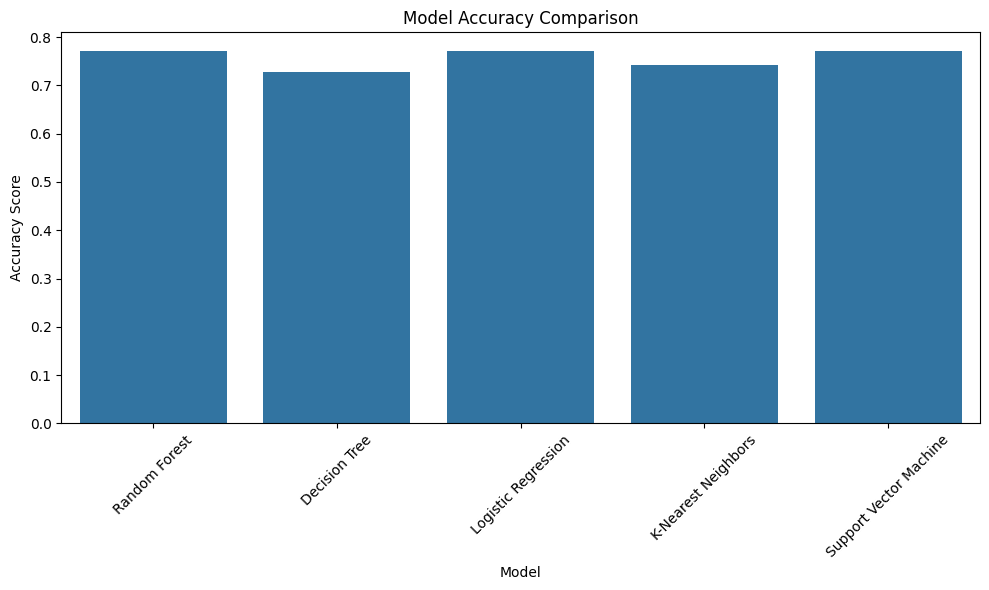

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
loan_train = pd.read_csv('data/loan-train.csv')

# Step 1: Clean the data
# Separate categorical and numerical columns
categorical_cols = loan_train.select_dtypes(include=['object']).columns
numerical_cols = loan_train.select_dtypes(exclude=['object']).columns

# Fill missing values: Categorical columns with mode, Numerical columns with mean
for col in categorical_cols:
    loan_train[col].fillna(loan_train[col].mode()[0], inplace=True)

for col in numerical_cols:
    loan_train[col].fillna(loan_train[col].mean(), inplace=True)

# Replace '3+' in Dependents with '3' and convert Dependents to numerical
loan_train['Dependents'] = loan_train['Dependents'].replace('3+', '3')

# One-hot encode categorical variables using pd.get_dummies
loan_train = pd.get_dummies(loan_train, columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'], drop_first=True)

# Step 2: Outlier Removal using IQR Method
Q1 = loan_train[numerical_cols].quantile(0.25)
Q3 = loan_train[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers based on IQR
loan_train = loan_train[~((loan_train[numerical_cols] < (Q1 - 1.5 * IQR)) | (loan_train[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Step 3: Normalize the numerical features
scaler = MinMaxScaler()
loan_train[numerical_cols] = scaler.fit_transform(loan_train[numerical_cols])

# Step 4: Prepare the data
X = loan_train.drop(columns=['Loan_ID', 'Loan_Status'])
y = loan_train['Loan_Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(random_state=42)
}

# Train models and evaluate their performance
model_accuracies = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy
    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

# Step 5: Visualize the results
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()))
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/pc/6rmkz3b536l1k66dbrhqbl2r0000gn/T/ipykernel_36574/3649325052.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_train[col].fillna(loan_train[col].mode()[0], inplace=True)
/var/folders/pc/6rmkz3b536l1k66dbrhqbl2r0000gn/T/ipykernel_36574/3649325052.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

--- Random Forest ---
Accuracy: 0.7714
              precision    recall  f1-score   support

           N       0.50      0.06      0.11        16
           Y       0.78      0.98      0.87        54

    accuracy                           0.77        70
   macro avg       0.64      0.52      0.49        70
weighted avg       0.72      0.77      0.70        70

--- Decision Tree ---
Accuracy: 0.7286
              precision    recall  f1-score   support

           N       0.42      0.50      0.46        16
           Y       0.84      0.80      0.82        54

    accuracy                           0.73        70
   macro avg       0.63      0.65      0.64        70
weighted avg       0.75      0.73      0.74        70

--- Logistic Regression ---
Accuracy: 0.7714
              precision    recall  f1-score   support

           N       0.00      0.00      0.00        16
           Y       0.77      1.00      0.87        54

    accuracy                           0.77        70
   ma

/Users/ismatsamadov/Loan_Eligiblity/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ismatsamadov/Loan_Eligiblity/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ismatsamadov/Loan_Eligiblity/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

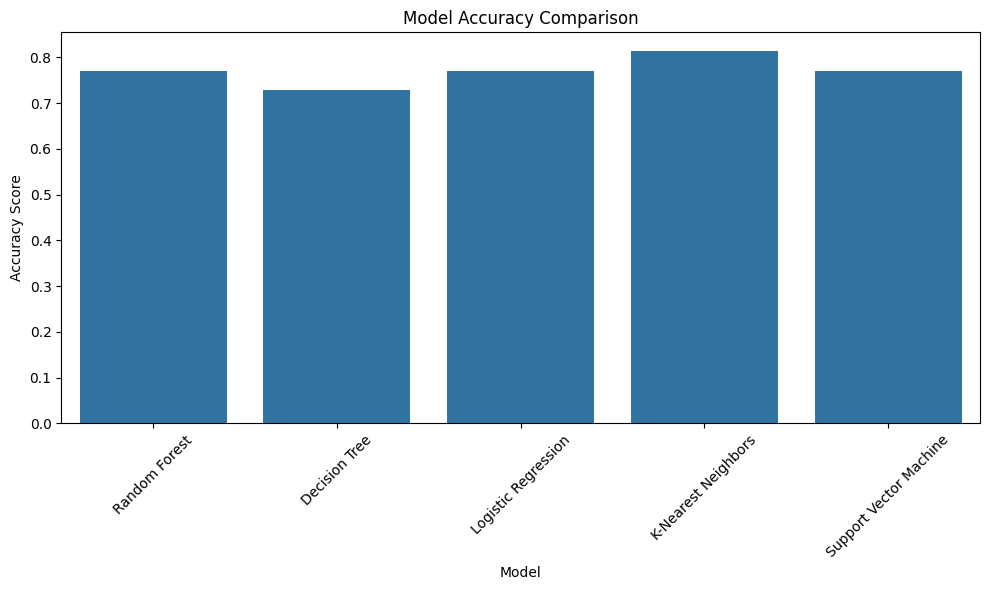

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
loan_train = pd.read_csv('data/loan-train.csv')

# Step 1: Clean the data
# Separate categorical and numerical columns
categorical_cols = loan_train.select_dtypes(include=['object']).columns
numerical_cols = loan_train.select_dtypes(exclude=['object']).columns

# Fill missing values: Categorical columns with mode, Numerical columns with mean
for col in categorical_cols:
    loan_train[col].fillna(loan_train[col].mode()[0], inplace=True)

for col in numerical_cols:
    loan_train[col].fillna(loan_train[col].mean(), inplace=True)

# Replace '3+' in Dependents with '3' and convert Dependents to numerical
loan_train['Dependents'] = loan_train['Dependents'].replace('3+', '3')

# One-hot encode categorical variables using pd.get_dummies
loan_train = pd.get_dummies(loan_train, columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'], drop_first=True)

# Step 2: Outlier Removal using IQR Method
Q1 = loan_train[numerical_cols].quantile(0.25)
Q3 = loan_train[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers based on IQR
loan_train = loan_train[~((loan_train[numerical_cols] < (Q1 - 1.5 * IQR)) | (loan_train[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Step 3: Prepare the data
X = loan_train.drop(columns=['Loan_ID', 'Loan_Status'])
y = loan_train['Loan_Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(random_state=42)
}

# Train models and evaluate their performance
model_accuracies = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy
    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

# Step 4: Visualize the results
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()))
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/pc/6rmkz3b536l1k66dbrhqbl2r0000gn/T/ipykernel_36574/3772103293.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_train[col].fillna(loan_train[col].mode()[0], inplace=True)
/var/folders/pc/6rmkz3b536l1k66dbrhqbl2r0000gn/T/ipykernel_36574/3772103293.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

--- Random Forest ---
Accuracy: 0.7724
              precision    recall  f1-score   support

           0       0.86      0.42      0.56        43
           1       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123

--- Decision Tree ---
Accuracy: 0.6829
              precision    recall  f1-score   support

           0       0.55      0.49      0.52        43
           1       0.74      0.79      0.76        80

    accuracy                           0.68       123
   macro avg       0.65      0.64      0.64       123
weighted avg       0.68      0.68      0.68       123



/Users/ismatsamadov/Loan_Eligiblity/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ismatsamadov/Loan_Eligiblity/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ismatsamadov/Loan_Eligiblity/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531

--- Logistic Regression ---
Accuracy: 0.7886
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

--- K-Nearest Neighbors ---
Accuracy: 0.5854
              precision    recall  f1-score   support

           0       0.25      0.09      0.14        43
           1       0.64      0.85      0.73        80

    accuracy                           0.59       123
   macro avg       0.44      0.47      0.43       123
weighted avg       0.50      0.59      0.52       123

--- Support Vector Machine ---
Accuracy: 0.6504
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.65      1.00      0.79        80

    accuracy                           0.65 

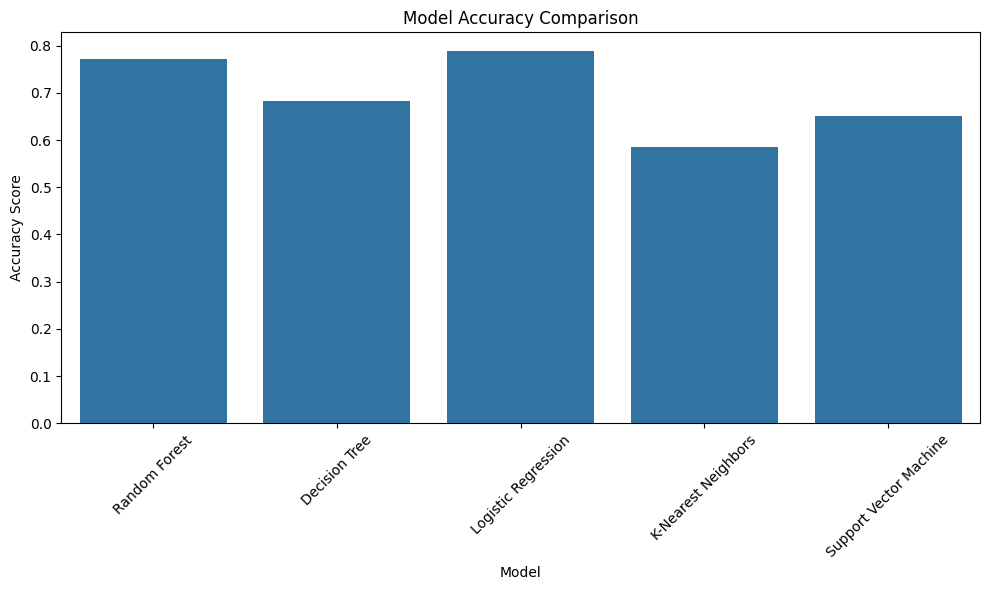

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
loan_train = pd.read_csv('data/loan-train.csv')

# Step 1: Clean the data
# Separate categorical and numerical columns
categorical_cols = loan_train.select_dtypes(include=['object']).columns
numerical_cols = loan_train.select_dtypes(exclude=['object']).columns

# Fill missing values: Categorical columns with mode, Numerical columns with mean
for col in categorical_cols:
    loan_train[col].fillna(loan_train[col].mode()[0], inplace=True)

for col in numerical_cols:
    loan_train[col].fillna(loan_train[col].mean(), inplace=True)

# Replace '3+' in Dependents with '3' and convert Dependents to numerical
loan_train['Dependents'] = loan_train['Dependents'].replace('3+', '3')

# One-hot encode categorical variables using pd.get_dummies
loan_train = pd.get_dummies(loan_train, columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'], drop_first=True)

# Encoding Loan_Status as it is the target variable
label_encoder = LabelEncoder()
loan_train['Loan_Status'] = label_encoder.fit_transform(loan_train['Loan_Status'])

# Step 2: Prepare the data
X = loan_train.drop(columns=['Loan_ID', 'Loan_Status'])
y = loan_train['Loan_Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(random_state=42)
}

# Train models and evaluate their performance
model_accuracies = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy
    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

# Step 3: Visualize the results
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()))
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/pc/6rmkz3b536l1k66dbrhqbl2r0000gn/T/ipykernel_36574/1264200611.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_train[col].fillna(loan_train[col].mode()[0], inplace=True)
/var/folders/pc/6rmkz3b536l1k66dbrhqbl2r0000gn/T/ipykernel_36574/1264200611.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

--- Random Forest ---
Cross-validated Accuracy: 0.8187
Test Accuracy: 0.6389
ROC-AUC Score: 0.6337
              precision    recall  f1-score   support

           N       0.25      0.15      0.19        20
           Y       0.72      0.83      0.77        52

    accuracy                           0.64        72
   macro avg       0.48      0.49      0.48        72
weighted avg       0.59      0.64      0.61        72

--- Decision Tree ---
Cross-validated Accuracy: 0.7354
Test Accuracy: 0.7083
ROC-AUC Score: 0.6135
              precision    recall  f1-score   support

           N       0.47      0.40      0.43        20
           Y       0.78      0.83      0.80        52

    accuracy                           0.71        72
   macro avg       0.63      0.61      0.62        72
weighted avg       0.70      0.71      0.70        72

--- Logistic Regression ---
Cross-validated Accuracy: 0.6042
Test Accuracy: 0.5972
ROC-AUC Score: 0.6029
              precision    recall  f1-score

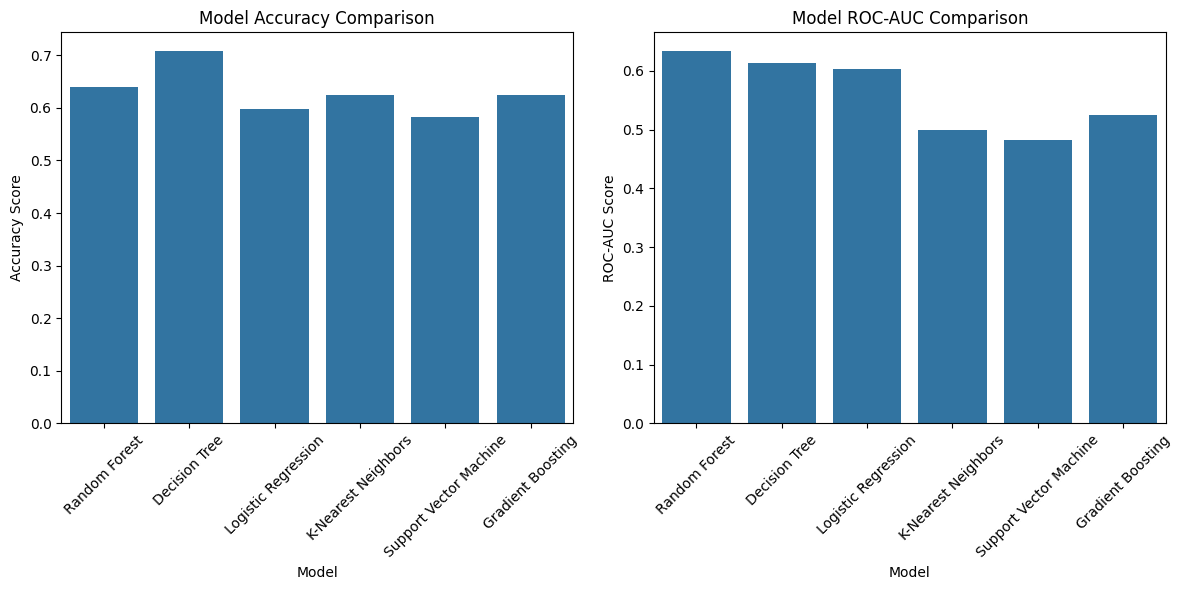

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
loan_train = pd.read_csv('data/loan-train.csv')

# Step 1: Clean the data
# Separate categorical and numerical columns
categorical_cols = loan_train.select_dtypes(include=['object']).columns
numerical_cols = loan_train.select_dtypes(exclude=['object']).columns

# Fill missing values: Categorical columns with mode, Numerical columns with mean
for col in categorical_cols:
    loan_train[col].fillna(loan_train[col].mode()[0], inplace=True)

for col in numerical_cols:
    loan_train[col].fillna(loan_train[col].mean(), inplace=True)

# Replace '3+' in Dependents with '3' and convert Dependents to numerical
loan_train['Dependents'] = loan_train['Dependents'].replace('3+', '3')

# One-hot encode categorical variables using pd.get_dummies
loan_train = pd.get_dummies(loan_train, columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'], drop_first=True)

# Step 2: Skewed Distribution Treatment (Square Root Transformation)
loan_train['ApplicantIncome'] = np.sqrt(loan_train['ApplicantIncome'])
loan_train['CoapplicantIncome'] = np.sqrt(loan_train['CoapplicantIncome'])
loan_train['LoanAmount'] = np.sqrt(loan_train['LoanAmount'])

# Step 3: Outlier Removal using IQR Method
Q1 = loan_train[numerical_cols].quantile(0.25)
Q3 = loan_train[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers based on IQR
loan_train = loan_train[~((loan_train[numerical_cols] < (Q1 - 1.5 * IQR)) | (loan_train[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Step 4: Normalize the numerical features
scaler = MinMaxScaler()
loan_train[numerical_cols] = scaler.fit_transform(loan_train[numerical_cols])

# Step 5: Prepare the data
X = loan_train.drop(columns=['Loan_ID', 'Loan_Status'])
y = loan_train['Loan_Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Train models and evaluate their performance using cross-validation
model_accuracies = {}
roc_auc_scores = {}
for model_name, model in models.items():
    model.fit(X_train_res, y_train_res)
    
    # Cross-validation for better model evaluation
    cv_scores = cross_val_score(model, X_train_res, y_train_res, cv=5, scoring='accuracy')
    cv_roc_auc = cross_val_score(model, X_train_res, y_train_res, cv=5, scoring='roc_auc')
    
    # Predictions on test set
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # For ROC-AUC score
    
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    
    model_accuracies[model_name] = accuracy
    roc_auc_scores[model_name] = roc_auc
    
    print(f"--- {model_name} ---")
    print(f"Cross-validated Accuracy: {np.mean(cv_scores):.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"ROC-AUC Score: {roc_auc:.4f}")
    print(classification_report(y_test, y_pred))

# Step 7: Visualize the results for Accuracy and ROC-AUC
plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()))
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.xticks(rotation=45)

# Plot ROC-AUC
plt.subplot(1, 2, 2)
sns.barplot(x=list(roc_auc_scores.keys()), y=list(roc_auc_scores.values()))
plt.title('Model ROC-AUC Comparison')
plt.xlabel('Model')
plt.ylabel('ROC-AUC Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Random Forest Accuracy: 0.8527
Random Forest ROC-AUC: 0.9480
              precision    recall  f1-score   support

       False       0.79      0.89      0.83        54
        True       0.91      0.83      0.87        75

    accuracy                           0.85       129
   macro avg       0.85      0.86      0.85       129
weighted avg       0.86      0.85      0.85       129



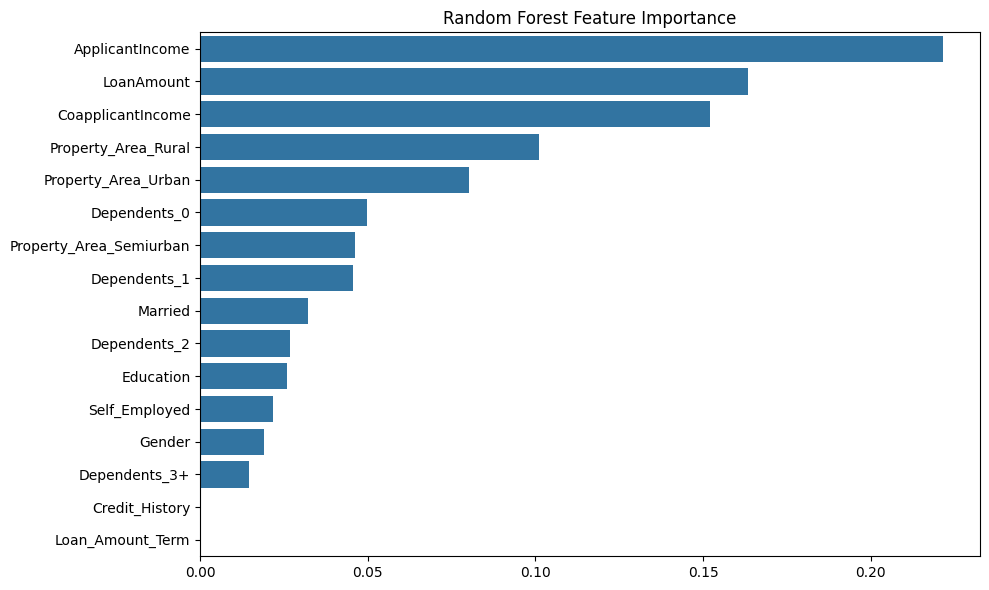

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('data/loan-train.csv')

# Step 5.1: Drop unnecessary variables (Loan_ID)
df = df.drop(['Loan_ID'], axis=1)

# Step 5.2: Data Imputation for Missing Values
# 5.2.1 Imputation for Categorical Variables (using mode)
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

# 5.2.2 Imputation for Numerical Variables (using mean)
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

# Step 5.3: One-hot Encoding for Categorical Variables
df = pd.get_dummies(df)

# Drop specific encoded columns
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No', 'Loan_Status_N'], axis=1)

# Rename columns for clarity
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}
df.rename(columns=new, inplace=True)

# Step 5.4: Remove Outliers Using IQR Method (Apply only to numerical columns)
numerical_cols = df.select_dtypes(include=[np.number]).columns

Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers based on IQR for numerical columns only
df = df[~((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Step 5.5: Skewed Distribution Treatment (Square Root Transformation)
df['ApplicantIncome'] = np.sqrt(df['ApplicantIncome'])
df['CoapplicantIncome'] = np.sqrt(df['CoapplicantIncome'])
df['LoanAmount'] = np.sqrt(df['LoanAmount'])

# Step 5.6: Separate Features (X) and Target (y)
X = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']

# Step 5.7: Apply SMOTE to handle class imbalance
X, y = SMOTE(random_state=42).fit_resample(X, y)

# Step 5.8: Data Normalization (MinMax Scaling)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Step 5.9: Train Random Forest Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Step 5.10: Model Evaluation
y_pred = rf_model.predict(X_test)
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print results
print(f"Random Forest Accuracy: {accuracy:.4f}")
print(f"Random Forest ROC-AUC: {roc_auc:.4f}")
print(classification_report(y_test, y_pred))

# Step 5.11: Visualize Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = df.drop(columns=['Loan_Status']).columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=[features[i] for i in indices])
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()


Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': True}
Optimized Random Forest Accuracy: 0.7805
Optimized Random Forest ROC-AUC: 0.7538
              precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



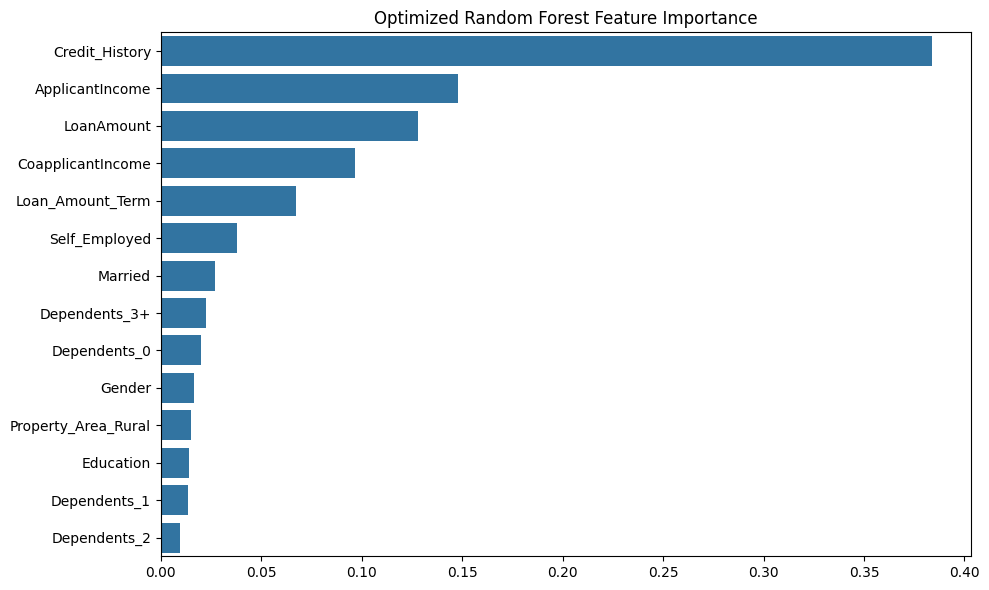

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('data/loan-train.csv')

# Step 5.1: Drop unnecessary variables (Loan_ID)
df = df.drop(['Loan_ID'], axis=1)

# Step 5.2: Data Imputation for Missing Values
# 5.2.1 Imputation for Categorical Variables (using mode)
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

# 5.2.2 Imputation for Numerical Variables (using mean)
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

# Step 5.3: One-hot Encoding for Categorical Variables
df = pd.get_dummies(df)

# Drop specific encoded columns
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No', 'Loan_Status_N'], axis=1)

# Rename columns for clarity
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}
df.rename(columns=new, inplace=True)

# Step 5.4: Remove Outliers Using IQR Method (Apply only to numerical columns)
numerical_cols = df.select_dtypes(include=[np.number]).columns

Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers based on IQR for numerical columns only
df = df[~((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Step 5.5: Skewed Distribution Treatment (Square Root Transformation)
df['ApplicantIncome'] = np.sqrt(df['ApplicantIncome'])
df['CoapplicantIncome'] = np.sqrt(df['CoapplicantIncome'])
df['LoanAmount'] = np.sqrt(df['LoanAmount'])

# Step 5.6: Separate Features (X) and Target (y)
X = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']

# Step 5.7: Apply SMOTE to handle class imbalance
X, y = SMOTE(random_state=42).fit_resample(X, y)

# Step 5.8: Data Normalization (MinMax Scaling)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Step 5.9: Define Random Forest Hyperparameter Grid
param_distributions = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Step 5.10: RandomizedSearchCV for Hyperparameter Tuning
rf_model = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_distributions,
                                   n_iter=50, cv=5, verbose=0, n_jobs=-1, scoring='roc_auc')
random_search.fit(X_train, y_train)

# Step 5.11: Evaluate the Best Model
best_rf_model = random_search.best_estimator_

y_pred = best_rf_model.predict(X_test)
y_pred_prob = best_rf_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print the best hyperparameters
print(f"Best Hyperparameters: {random_search.best_params_}")

# Print results of the best model
print(f"Optimized Random Forest Accuracy: {accuracy:.4f}")
print(f"Optimized Random Forest ROC-AUC: {roc_auc:.4f}")
print(classification_report(y_test, y_pred))

# Step 5.12: Visualize Feature Importance
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = df.drop(columns=['Loan_Status']).columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=[features[i] for i in indices])
plt.title('Optimized Random Forest Feature Importance')
plt.tight_layout()
plt.show()


Best Hyperparameters: OrderedDict({'bootstrap': True, 'max_depth': 36, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 437})
Optimized Random Forest Accuracy: 0.8295
Optimized Random Forest ROC-AUC: 0.9394
              precision    recall  f1-score   support

       False       0.77      0.85      0.81        54
        True       0.88      0.81      0.85        75

    accuracy                           0.83       129
   macro avg       0.83      0.83      0.83       129
weighted avg       0.83      0.83      0.83       129



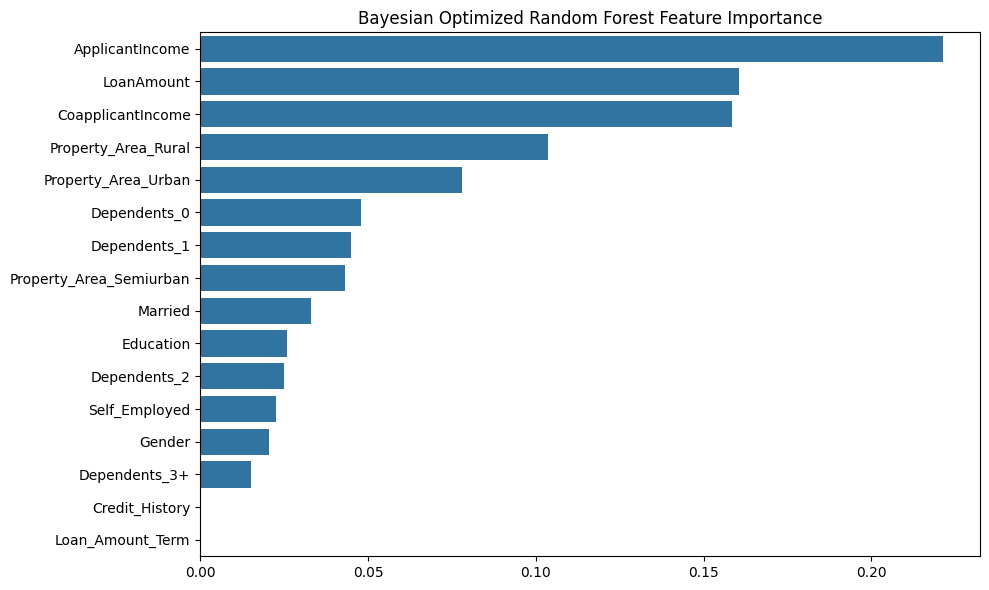

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skopt import BayesSearchCV
from skopt.space import Real, Integer

# Load the dataset
df = pd.read_csv('data/loan-train.csv')

# Step 5.1: Drop unnecessary variables (Loan_ID)
df = df.drop(['Loan_ID'], axis=1)

# Step 5.2: Data Imputation for Missing Values
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

# Imputation for Numerical Variables (using mean)
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

# One-hot Encoding for Categorical Variables
df = pd.get_dummies(df)

# Drop specific encoded columns
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No', 'Loan_Status_N'], axis=1)

# Rename columns for clarity
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}
df.rename(columns=new, inplace=True)

# Remove Outliers Using IQR Method
numerical_cols = df.select_dtypes(include=[np.number]).columns

Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers based on IQR for numerical columns only
df = df[~((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Skewed Distribution Treatment (Square Root Transformation)
df['ApplicantIncome'] = np.sqrt(df['ApplicantIncome'])
df['CoapplicantIncome'] = np.sqrt(df['CoapplicantIncome'])
df['LoanAmount'] = np.sqrt(df['LoanAmount'])

# Separate Features (X) and Target (y)
X = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']

# Apply SMOTE to handle class imbalance
X, y = SMOTE(random_state=42).fit_resample(X, y)

# Data Normalization (MinMax Scaling)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Random Forest Hyperparameter Space
param_space = {
    'n_estimators': Integer(100, 500),  # Range of trees
    'max_depth': Integer(5, 50),        # Range of tree depth
    'min_samples_split': Integer(2, 20),# Minimum number of samples for a split
    'min_samples_leaf': Integer(1, 10), # Minimum number of samples at a leaf
    'bootstrap': [True, False],         # Whether to use bootstrap samples
    'max_features': ['sqrt', 'log2'],  # Number of features to consider
}

# Initialize RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Use BayesSearchCV for Bayesian Optimization
opt = BayesSearchCV(
    estimator=rf_model,
    search_spaces=param_space,
    n_iter=30,  # Number of parameter settings that are sampled
    cv=5,       # 5-fold cross-validation
    scoring='roc_auc',
    random_state=42,
    verbose=0,
    n_jobs=-1
)

# Fit the Bayesian Optimization search
opt.fit(X_train, y_train)

# Evaluate the best model
best_rf_model = opt.best_estimator_

y_pred = best_rf_model.predict(X_test)
y_pred_prob = best_rf_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print the best hyperparameters
print(f"Best Hyperparameters: {opt.best_params_}")

# Print results of the optimized model
print(f"Optimized Random Forest Accuracy: {accuracy:.4f}")
print(f"Optimized Random Forest ROC-AUC: {roc_auc:.4f}")
print(classification_report(y_test, y_pred))

# Visualize Feature Importance
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = df.drop(columns=['Loan_Status']).columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=[features[i] for i in indices])
plt.title('Bayesian Optimized Random Forest Feature Importance')
plt.tight_layout()
plt.show()


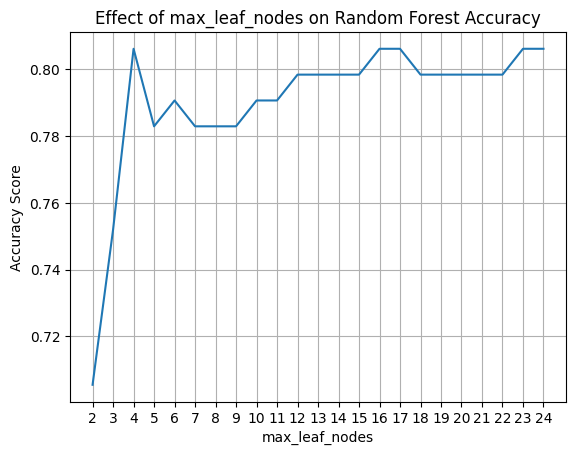

Best Random Forest Accuracy: 80.62%
Optimal max_leaf_nodes: 4
Best Hyperparameters: OrderedDict({'bootstrap': True, 'max_depth': 36, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 437})
Optimized Random Forest Accuracy: 0.8295
Optimized Random Forest ROC-AUC: 0.9394
              precision    recall  f1-score   support

       False       0.77      0.85      0.81        54
        True       0.88      0.81      0.85        75

    accuracy                           0.83       129
   macro avg       0.83      0.83      0.83       129
weighted avg       0.83      0.83      0.83       129



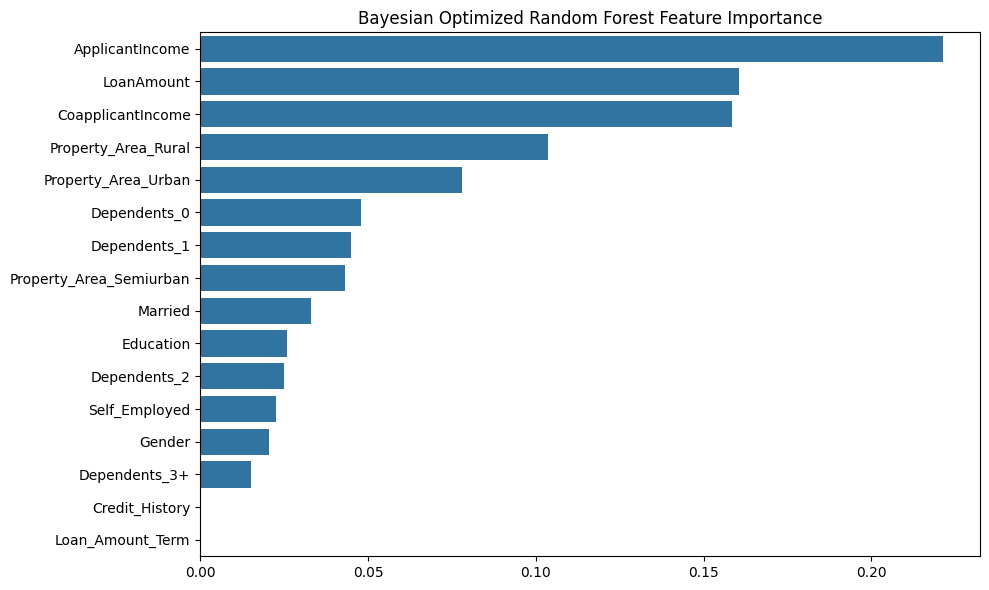

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skopt import BayesSearchCV
from skopt.space import Real, Integer

# Load the dataset
df = pd.read_csv('data/loan-train.csv')

# Step 5.1: Drop unnecessary variables (Loan_ID)
df = df.drop(['Loan_ID'], axis=1)

# Step 5.2: Data Imputation for Missing Values
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

# Imputation for Numerical Variables (using mean)
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

# One-hot Encoding for Categorical Variables
df = pd.get_dummies(df)

# Drop specific encoded columns
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No', 'Loan_Status_N'], axis=1)

# Rename columns for clarity
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}
df.rename(columns=new, inplace=True)

# Remove Outliers Using IQR Method
numerical_cols = df.select_dtypes(include=[np.number]).columns
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers based on IQR for numerical columns only
df = df[~((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Skewed Distribution Treatment (Square Root Transformation)
df['ApplicantIncome'] = np.sqrt(df['ApplicantIncome'])
df['CoapplicantIncome'] = np.sqrt(df['CoapplicantIncome'])
df['LoanAmount'] = np.sqrt(df['LoanAmount'])

# Separate Features (X) and Target (y)
X = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']

# Apply SMOTE to handle class imbalance
X, y = SMOTE(random_state=42).fit_resample(X, y)

# Data Normalization (MinMax Scaling)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5.9: Hyperparameter Tuning for max_leaf_nodes
scoreListRF = []
for i in range(2, 25):
    RFclassifier = RandomForestClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))

# Plot the results
plt.plot(range(2, 25), scoreListRF)
plt.xticks(np.arange(2, 25, 1))
plt.xlabel("max_leaf_nodes")
plt.ylabel("Accuracy Score")
plt.title("Effect of max_leaf_nodes on Random Forest Accuracy")
plt.grid(True)
plt.show()

# Maximum Accuracy and corresponding max_leaf_nodes
RFAcc = max(scoreListRF)
best_leaf_nodes = scoreListRF.index(RFAcc) + 2
print("Best Random Forest Accuracy: {:.2f}%".format(RFAcc * 100))
print(f"Optimal max_leaf_nodes: {best_leaf_nodes}")

# Optional: Continue to Bayesian Optimization for other hyperparameters
param_space = {
    'n_estimators': Integer(100, 500),  
    'max_depth': Integer(5, 50),        
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 10), 
    'bootstrap': [True, False],         
    'max_features': ['sqrt', 'log2'],   
}

rf_model = RandomForestClassifier(random_state=42)

# Use BayesSearchCV for Bayesian Optimization
opt = BayesSearchCV(
    estimator=rf_model,
    search_spaces=param_space,
    n_iter=30,  
    cv=5,       
    scoring='roc_auc',
    random_state=42,
    verbose=0,
    n_jobs=-1
)

# Fit the Bayesian Optimization search
opt.fit(X_train, y_train)

# Evaluate the best model
best_rf_model = opt.best_estimator_

y_pred = best_rf_model.predict(X_test)
y_pred_prob = best_rf_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print the best hyperparameters
print(f"Best Hyperparameters: {opt.best_params_}")

# Print results of the optimized model
print(f"Optimized Random Forest Accuracy: {accuracy:.4f}")
print(f"Optimized Random Forest ROC-AUC: {roc_auc:.4f}")
print(classification_report(y_test, y_pred))

# Visualize Feature Importance
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = df.drop(columns=['Loan_Status']).columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=[features[i] for i in indices])
plt.title('Bayesian Optimized Random Forest Feature Importance')
plt.tight_layout()
plt.show()


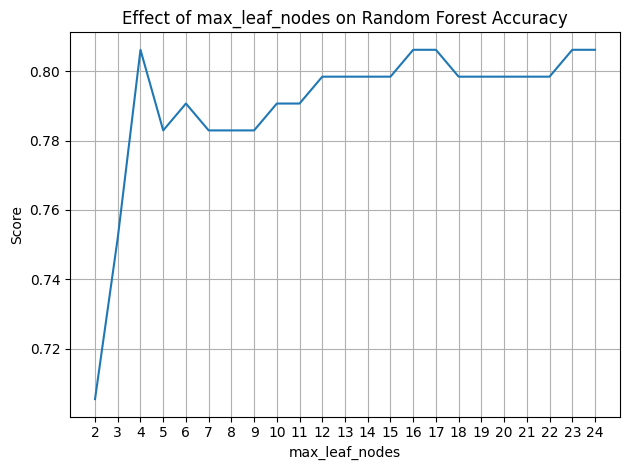

Best Random Forest Accuracy: 0.8062
Optimal max_leaf_nodes: 4
Optimized Random Forest Accuracy with max_leaf_nodes=4: 0.8062
Optimized Random Forest ROC-AUC: 0.8558
              precision    recall  f1-score   support

       False       0.71      0.91      0.80        54
        True       0.92      0.73      0.81        75

    accuracy                           0.81       129
   macro avg       0.81      0.82      0.81       129
weighted avg       0.83      0.81      0.81       129



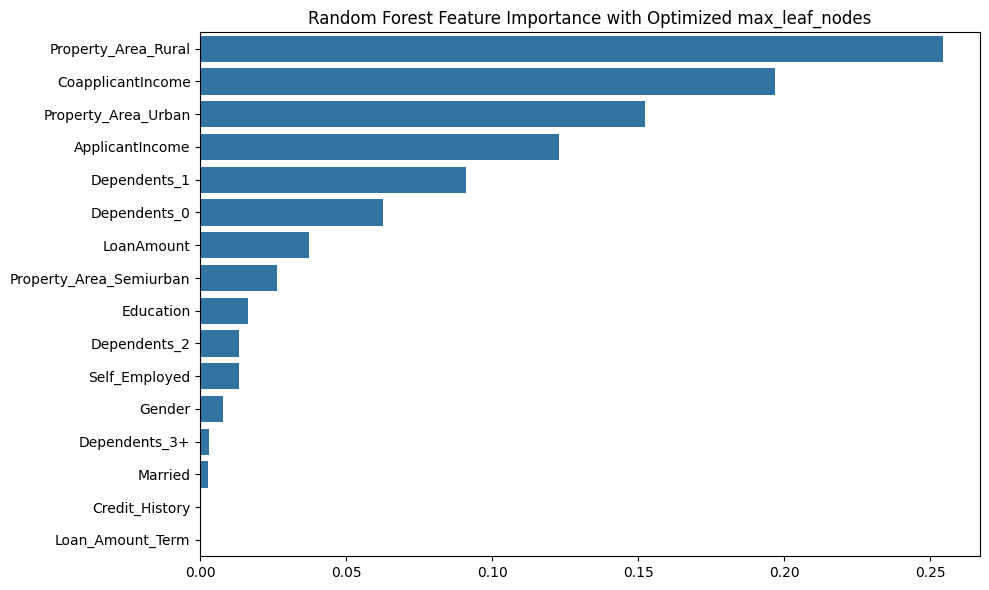

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skopt import BayesSearchCV
from skopt.space import Real, Integer

# Load the dataset
df = pd.read_csv('data/loan-train.csv')

# Step 5.1: Drop unnecessary variables (Loan_ID)
df = df.drop(['Loan_ID'], axis=1)

# Step 5.2: Data Imputation for Missing Values
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

# Imputation for Numerical Variables (using mean)
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

# One-hot Encoding for Categorical Variables
df = pd.get_dummies(df)

# Drop specific encoded columns
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No', 'Loan_Status_N'], axis=1)

# Rename columns for clarity
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}
df.rename(columns=new, inplace=True)

# Remove Outliers Using IQR Method
numerical_cols = df.select_dtypes(include=[np.number]).columns

Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers based on IQR for numerical columns only
df = df[~((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Skewed Distribution Treatment (Square Root Transformation)
df['ApplicantIncome'] = np.sqrt(df['ApplicantIncome'])
df['CoapplicantIncome'] = np.sqrt(df['CoapplicantIncome'])
df['LoanAmount'] = np.sqrt(df['LoanAmount'])

# Separate Features (X) and Target (y)
X = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']

# Apply SMOTE to handle class imbalance
X, y = SMOTE(random_state=42).fit_resample(X, y)

# Data Normalization (MinMax Scaling)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement a loop over max_leaf_nodes to tune the Random Forest
scoreListRF = []
for i in range(2, 25):
    RFclassifier = RandomForestClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))

# Plot the results for max_leaf_nodes
plt.plot(range(2, 25), scoreListRF)
plt.xticks(np.arange(2, 25, 1))
plt.xlabel("max_leaf_nodes")
plt.ylabel("Score")
plt.title("Effect of max_leaf_nodes on Random Forest Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()

# Extract the maximum accuracy and the corresponding max_leaf_nodes value
RFAcc = max(scoreListRF)
best_leaf_nodes = scoreListRF.index(RFAcc) + 2  # Adding 2 because range starts from 2
print(f"Best Random Forest Accuracy: {RFAcc:.4f}")
print(f"Optimal max_leaf_nodes: {best_leaf_nodes}")

# Additional evaluation with best parameters
rf_model_optimized = RandomForestClassifier(
    n_estimators=1000, 
    random_state=1, 
    max_leaf_nodes=best_leaf_nodes
)
rf_model_optimized.fit(X_train, y_train)

y_pred = rf_model_optimized.predict(X_test)
y_pred_prob = rf_model_optimized.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print final results
print(f"Optimized Random Forest Accuracy with max_leaf_nodes={best_leaf_nodes}: {accuracy:.4f}")
print(f"Optimized Random Forest ROC-AUC: {roc_auc:.4f}")
print(classification_report(y_test, y_pred))

# Feature Importance Visualization
importances = rf_model_optimized.feature_importances_
indices = np.argsort(importances)[::-1]
features = df.drop(columns=['Loan_Status']).columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=[features[i] for i in indices])
plt.title('Random Forest Feature Importance with Optimized max_leaf_nodes')
plt.tight_layout()
plt.show()


Optimized Random Forest Accuracy: 0.8372
Optimized Random Forest ROC-AUC: 0.9420
              precision    recall  f1-score   support

       False       0.77      0.87      0.82        54
        True       0.90      0.81      0.85        75

    accuracy                           0.84       129
   macro avg       0.83      0.84      0.84       129
weighted avg       0.84      0.84      0.84       129



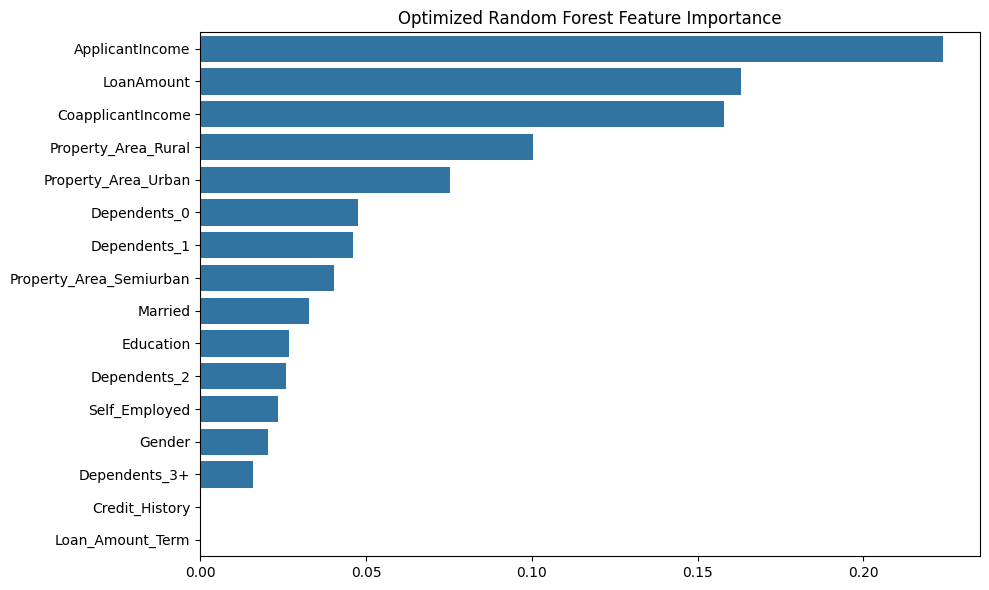

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('data/loan-train.csv')

# Step 1: Drop unnecessary variables (Loan_ID)
df = df.drop(['Loan_ID'], axis=1)

# Step 2: Data Imputation for Missing Values
# Imputation for Categorical Variables using mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

# Imputation for Numerical Variables using mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

# Step 3: One-hot Encoding for Categorical Variables
df = pd.get_dummies(df)

# Drop specific encoded columns
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No', 'Loan_Status_N'], axis=1)

# Rename columns for clarity
df.rename(columns={'Gender_Male': 'Gender', 
                   'Married_Yes': 'Married', 
                   'Education_Graduate': 'Education', 
                   'Self_Employed_Yes': 'Self_Employed', 
                   'Loan_Status_Y': 'Loan_Status'}, inplace=True)

# Step 4: Remove Outliers Using IQR Method
numerical_cols = df.select_dtypes(include=[np.number]).columns
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers based on IQR for numerical columns only
df = df[~((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Step 5: Skewed Distribution Treatment (Square Root Transformation)
df['ApplicantIncome'] = np.sqrt(df['ApplicantIncome'])
df['CoapplicantIncome'] = np.sqrt(df['CoapplicantIncome'])
df['LoanAmount'] = np.sqrt(df['LoanAmount'])

# Step 6: Separate Features (X) and Target (y)
X = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']

# Step 7: Apply SMOTE to handle class imbalance
X, y = SMOTE(random_state=42).fit_resample(X, y)

# Step 8: Data Normalization (MinMax Scaling)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 9: Train Random Forest Model with Best Hyperparameters
best_rf_model = RandomForestClassifier(
    n_estimators=1000, 
    max_depth=45, 
    max_features='log2', 
    min_samples_leaf=1, 
    min_samples_split=2, 
    bootstrap=True,
    random_state=42,
    # max_leaf_nodes=25
)
best_rf_model.fit(X_train, y_train)

# Step 10: Model Evaluation
y_pred = best_rf_model.predict(X_test)
y_pred_prob = best_rf_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print the best hyperparameters
print(f"Optimized Random Forest Accuracy: {accuracy:.4f}")
print(f"Optimized Random Forest ROC-AUC: {roc_auc:.4f}")
print(classification_report(y_test, y_pred))

# Step 11: Visualize Feature Importance
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = df.drop(columns=['Loan_Status']).columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=[features[i] for i in indices])
plt.title('Optimized Random Forest Feature Importance')
plt.tight_layout()
plt.show()


In [5]:
import pickle
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Function to save the model and the scaler
def save_model(model, scaler, file_path_model, file_path_scaler):
    with open(file_path_model, 'wb') as file:
        pickle.dump(model, file)
    with open(file_path_scaler, 'wb') as file:
        pickle.dump(scaler, file)
    print(f"Model and Scaler saved to {file_path_model} and {file_path_scaler}")

# Function to load the saved model and scaler
def load_model(file_path_model, file_path_scaler):
    with open(file_path_model, 'rb') as file:
        model = pickle.load(file)
    with open(file_path_scaler, 'rb') as file:
        scaler = pickle.load(file)
    return model, scaler

# Function to predict loan status using the saved model
def predict_loan_status(applicant_income, coapplicant_income, loan_amount, loan_amount_term, 
                        credit_history, gender, married, dependents, education, self_employed, property_area, 
                        model_path='best_rf_model.pkl', scaler_path='scaler.pkl', threshold=0.5):
    
    # Map the dependents value to be consistent with training data
    if dependents == '3':
        dependents = '3+'  # Match the training data encoding
    
    # Create a DataFrame with the input values
    input_data = pd.DataFrame({
        'ApplicantIncome': [applicant_income],
        'CoapplicantIncome': [coapplicant_income],
        'LoanAmount': [loan_amount],
        'Loan_Amount_Term': [loan_amount_term],
        'Credit_History': [credit_history],
        'Gender': [gender],
        'Married': [married],
        'Dependents': [dependents],
        'Education': [education],
        'Self_Employed': [self_employed],
        'Property_Area': [property_area]
    })

    # Apply transformations used during training
    input_data['ApplicantIncome'] = np.sqrt(input_data['ApplicantIncome'])
    input_data['CoapplicantIncome'] = np.sqrt(input_data['CoapplicantIncome'])
    input_data['LoanAmount'] = np.sqrt(input_data['LoanAmount'])
    
    # Apply one-hot encoding (must be the same as during training)
    input_data = pd.get_dummies(input_data)
    
    # Add missing columns that were present during training
    expected_columns = [
        'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
        'Gender', 'Married', 'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+', 
        'Education', 'Self_Employed', 'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban'
    ]
    
    for col in expected_columns:
        if col not in input_data.columns:
            input_data[col] = 0  # Add missing columns with 0
    
    # Reorder columns to match the model input
    input_data = input_data[expected_columns]
    
    # Load the saved model and scaler
    model, scaler = load_model(model_path, scaler_path)

    # Normalize the input data using the saved MinMaxScaler
    input_data_scaled = scaler.transform(input_data)

    # Make the prediction and check probabilities
    prediction_prob = model.predict_proba(input_data_scaled)[:, 1]  # Get probability of being "Approved"
    
    # Print probability for debugging purposes
    print(f"Probability of approval: {prediction_prob[0]:.4f}")
    
    # Apply a custom threshold to the probability
    prediction = (prediction_prob >= threshold).astype(int)
    
    return "Approved" if prediction[0] == 1 else "Rejected"

# Example: Save the trained model and scaler
save_model(best_rf_model, scaler, 'best_rf_model.pkl', 'scaler.pkl')

# Example: Predict using the saved model and scaler
result = predict_loan_status(5000, 2000, 150, 360, 1, 'Male', 'Yes', '0', 'Graduate', 'No', 'Urban')
print(result)  # This will print "Approved" or "Rejected"

result = predict_loan_status(0, 0, 150, 360, 1, 'Male', 'Yes', '3', 'Graduate', 'No', 'Urban')  # Adjusted for 3+ case
print(result)  # This will print "Approved" or "Rejected"


Model and Scaler saved to best_rf_model.pkl and scaler.pkl
Probability of approval: 0.6310
Approved
Probability of approval: 0.4280
Rejected
